<center><h1>Homework 2</h1></center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Particle1D_2 import Pendulum

Estimated Lyapunov Exponent:  0.21874558383443438


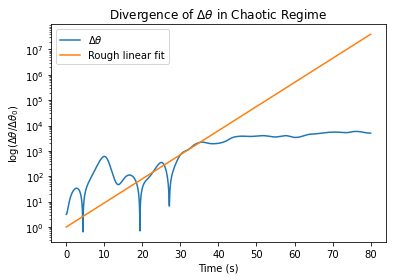

In [8]:
theta0 = 0.1
deltatheta0 = np.linspace(0.001, 0.01, 10, endpoint = True)
tf = 80.0
dt = 0.001
npoints = int(tf/dt)

t = np.linspace(0.0, tf, npoints, endpoint = True)
p1 = Pendulum(x0 = theta0*np.pi, l = 9.8, omega_d = 0.6, Fd = 1.0, nu = 0.5, tf = tf, dt = dt)
p1.scipy_trajectory()

avg_dtheta = np.zeros(npoints)
for dtheta0 in deltatheta0:
    p2 = Pendulum(x0 = (theta0+dtheta0)*np.pi, l = 9.8, omega_d = 0.6, Fd = 1.1, nu = 0.5, tf = tf, dt = dt)
    p2.scipy_trajectory()

    dtheta = np.abs(p1.xv_unwrap[:,0]-p2.xv_unwrap[:,0]) / dtheta0
    avg_dtheta += dtheta

avg_dtheta /= len(deltatheta0)

fig = plt.figure()
ax = fig.add_subplot(111)

lyapunov = 0.095*np.log(10)
print('Estimated Lyapunov Exponent: ', lyapunov)
ax.semilogy(t, avg_dtheta, label='$\\Delta\\theta$')
ax.plot([0,tf], [1,np.exp(tf*lyapunov)], label='Rough linear fit')
ax.set_xlabel('Time (s)')
ax.set_ylabel('$\\log(\\Delta\\theta/\\Delta\\theta_0)$')
ax.set_title('Divergence of $\\Delta\\theta$ in Chaotic Regime')
ax.legend()

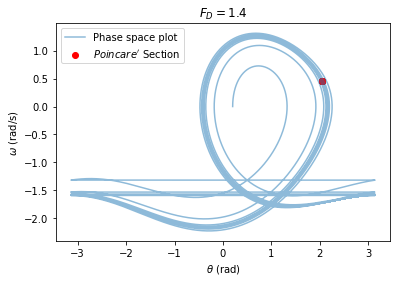

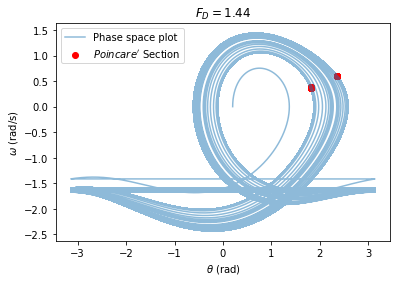

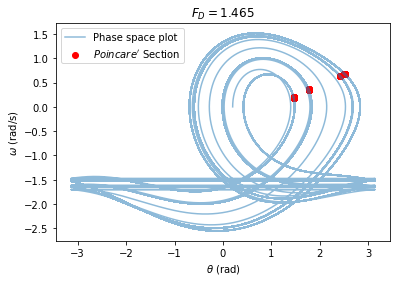

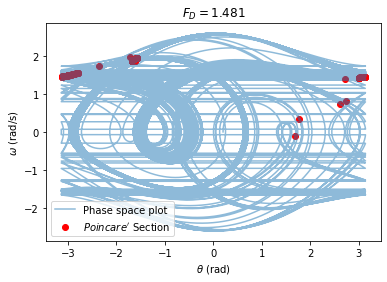

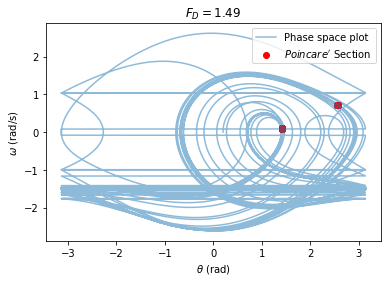

In [55]:
Fd = [1.4, 1.44, 1.465, 1.481, 1.49]
omega_d = 2/3
tf = 2000.0
dt = 0.005
npoints = int(tf/dt)
steady = 200.0

t = np.linspace(0.0, tf, npoints, endpoint = True)
for f in Fd:
    pend = Pendulum(l = 9.8, omega_d = omega_d, Fd = f, nu = 0.5, v0 = 0, x0 = 0.2, tf = tf, dt = dt)
    pend.scipy_trajectory()
    sample_points = (np.arange(steady, tf, 2*np.pi/omega_d) + dt/2) // dt
    sample_points = sample_points.astype(int)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(pend.xv[:,0], pend.xv[:,1], linestyle='-', label='Phase space plot', alpha=0.5)
    ax.scatter(pend.xv[sample_points, 0], pend.xv[sample_points, 1], color='r', label="$Poincare'$ Section")
    ax.legend()
    ax.set_title('$F_D={}$'.format(f))
    ax.set_xlabel('$\\theta$ (rad)')
    ax.set_ylabel('$\\omega$ (rad/s)')

The red markers show points sampled at the driving frequency. For the first three plots, these lie on the thick curves of the phase space plot, showing that the samples are taken when the steady state has been achieved. We can see period doubling occurring with 1, 2 and 4 points in the attractor respectively for the driving force amplitudes $1.4$, $1.44$ and $1.465$.

In the fourth plot, $F_D=1.481$ and we can see that chaos has been established. There is no fixed attractor curve and the sampled points are aperiodic, i.e. will not repeat for infinitely many samples. In the fifth plot with $F_D=1.49$ we again have a stable attractor with a periodicity of 2.

1  branches at mu= 0.0
2  branches at mu= 2.9833466933867734
4  branches at mu= 3.4626853707414824
8  branches at mu= 3.5485370741482964
Branch points:  [3.0, 3.4494897, 3.5440903, 3.5644073, 3.5687594, 3.5696916]
Ratios:  [4.75144661 4.65622877 4.66832104 4.66863334]


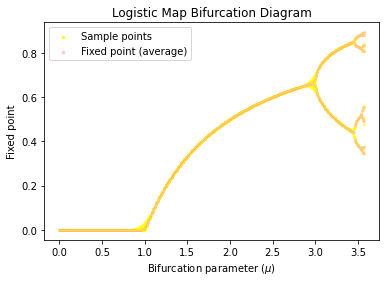

In [222]:
def logistic_map(mu, x):
    return mu*x*(1-x)

parameter = np.linspace(0.0, 3.57, 500)
branches = 1 # number of branches at initial point
prev_branch = 0
steady = 20
epsilon = 0.01

for mu in parameter:
    x = [0.2]
    for i in range(299):
        x.append(logistic_map(mu, x[i]))
        
    if (abs(x[steady+branches]-x[steady]) > epsilon):
        branches *= 2
    sums = np.zeros(branches)
    counts = np.zeros(branches)
    for i in range(steady, 300):
        sums[i%branches] += x[i]
        counts[i%branches] += 1
    avg = sums / counts;
    if (prev_branch != branches and np.count_nonzero(np.abs(avg[1:] - avg[0]) < epsilon) == 0):
        prev_branch = branches
        print(branches, ' branches at mu=', mu)
        
    plt.scatter([mu]*280, x[steady:], 1.0, 'yellow', alpha=0.1)
    plt.scatter([mu]*branches, avg, 2.0, 'pink')

plt.scatter([], [], 5.0, 'yellow', label='Sample points')
plt.scatter([], [], 5.0, 'pink', label='Fixed point (average)')
plt.title('Logistic Map Bifurcation Diagram')
plt.xlabel('Bifurcation parameter ($\\mu$)')
plt.ylabel('Fixed point')
plt.legend()

branch_points = [3.0, 3.4494897, 3.5440903, 3.5644073, 3.5687594, 3.5696916]
diff = np.array(branch_points[1:]) - np.array(branch_points[:-1])
print('Branch points: ', branch_points)
print('Ratios: ', diff[:-1]/diff[1:])

The numerical results obtained by the code are close but not accurate enough. I therefore used the bifurcation values given <a href="https://en.wikipedia.org/wiki/Feigenbaum_constants#Non-linear_maps">here</a> to estimate the Feigenbaum constant. We can see that the inverse ratio of the distances between successive intervals is approaching $\delta\simeq4.669$.